In [120]:
#student name: gatsby yang
# import pandas library using alias pd
import pandas as pd
#pd.set_option('precision', 2)

# load the data
review_information = pd.read_csv(filepath_or_buffer='dataset.csv')

In [121]:
review_information.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,NaN
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,NaN
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,NaN


In [122]:
for index, row in review_information.iterrows():
    if (row['Score'] < 3):
        review_information.loc[index,'Label'] = 'neg'
    elif (row['Score'] > 3):
        review_information.loc[index,'Label'] = 'pos'
        
    else:
        review_information.drop(index, inplace=True)


In [123]:
review_information.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,neg
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,pos
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,pos
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,neg
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,pos


#### count positive and negative reviews

In [124]:
pos = 0
neg = 0
for index, row in review_information.iterrows():
    if (row['Score'] == 3):
        score_3+= 1
    elif (row['Label']=='pos'):
        pos+= 1
    elif (row['Label']=='neg'):
        neg+= 1
        

print ('positive:'+ str(pos))
print ('negative:'+ str(neg))

positive:23228
negative:4826


In [125]:
review_information.count()

Id                        28054
ProductId                 28054
UserId                    28054
ProfileName               28052
HelpfulnessNumerator      28054
HelpfulnessDenominator    28054
Score                     28054
Time                      28054
Summary                   28054
Text                      28054
Label                     28054
dtype: int64

# Q2

### Checking data

In [126]:
#check the content in cloumn
review_information.loc[1, "Text"]

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [127]:
#check the content in cloumn
review_information.loc[139, "Text"]

'This candy tasted like sugar without much rose flavor at all.<br /><br />I ended up throwing most of it out because I don\'t like so much sugar.... I prefer strong flavors like <a href="http://www.amazon.com/gp/product/B001KYOENE">Altoids Twin Pack Mints, Wintergreen 2 tins</a><br /><br />The center of the candy does have a licorice flavor because it\'s an anise seed.  But there are better licorice candies out there like <a href="http://www.amazon.com/gp/product/B0029JTZLK">Twizzlers Twists, Black  Licorice, 1-Pound Bags (Pack of 6)</a>.'

### Data cleaning 

In [128]:
import re

# define a function to clean a tweet
def clean_text(text):
    
    #remove <a href=""></a>
    text = re.sub(r"<[^>]*>", " ", text)
    
    # remove hyper-links
    text = re.sub(r"http[\S]+", " ", text)
    
    # remove numbers
    text = re.sub(r"[1-9]+", " ", text)

    
    # remove new line characters (\n)
    text = re.sub(r"\\n"," ", text)
    
    #remove bracket 
    text = re.sub(r"(<br \W>)+", " ", text)

    # remove hash-tags
    text = re.sub(r"@\S+", " ", text)
    
    # remove any weired characters
    text = re.sub(r"[^A-Za-z*'-]+", " ", text)
    

    # convert tweet text to lowercase
    text = text.lower().strip()
    
    return text

In [129]:
#apply the function to clean the tweets.
review_information["Text"] = review_information["Text"].apply(clean_text)

In [130]:
#check the content in cloumn again 
review_information.loc[139, "Text"]

"this candy tasted like sugar without much rose flavor at all i ended up throwing most of it out because i don't like so much sugar i prefer strong flavors like altoids twin pack mints wintergreen tins the center of the candy does have a licorice flavor because it's an anise seed but there are better licorice candies out there like twizzlers twists black licorice -pound bags pack of"

# Q3

In [131]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4557667/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### BOW setting and Train-Test Split 

In [132]:
# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

# Define X(features) and y(target)
X = review_information["Text"]
y = review_information["Label"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=random_state)

# define stop words and also add custom stop words such as 'vaccine'
stop_words = stopwords.words('english')
stop_words.extend(['I', 'i', 'You', 'am', 'are', 'it', 'is'])

In [133]:
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all tweets will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)

In [134]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names()).T

# display the last few rows of the dataframe
training_data_BOW.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
actually,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
add,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Logistic Regression Model

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
# define lgositic regression model object
log_reg = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF5ECD3940)

#### predicte test data

In [137]:
# make prediction on test data

# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# view the part of predictions
y_test_log_reg_predictions[40:60]

array(['pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'pos'], dtype=object)

# Q4

#### Building Baseline Model

In [138]:
# identify most frequently occurring sentiment in the train data
y_train.value_counts()

pos    16286
neg     3351
Name: Label, dtype: int64

In [139]:
# assign 'Pos' to test data
y_test_baseline_predictions = pd.Series(['pos']*len(y_test))

#### Accuracy

In [140]:
from sklearn.metrics import accuracy_score
# baseline model accuracy 
acurracy_baseline = accuracy_score(y_test, y_test_baseline_predictions)
acurracy_baseline

0.8247594154686944

In [141]:
from sklearn.metrics import accuracy_score
# logistic regression model accuracy 
accuracy_logistic_regression = accuracy_score(y_test, y_test_log_reg_predictions)
accuracy_logistic_regression

0.8786978733515505

#### Confusion matrix

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

##### confusion matrix for logistic regression models

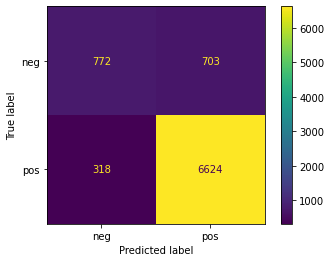

In [143]:
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

Let's interpret the confusion matrix and derieve some useful metrics. Here,
* Model correctly identified 772 negative sentiment tweets as negative. (True Negative - TN)
* Model correctly identified 6624 positive sentiment tweets as positive. (True Positive - TP)
* Model incorrectly identified 318 positive sentiment tweets as negative. (False Negative - FN)
* Model incorrectly identified 703 negative sentiment tweets as positive. (False Positive - FP)

##### confusion matrix for  baseline model

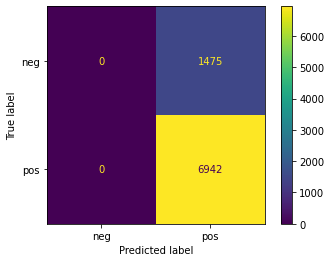

In [144]:
cm = confusion_matrix(y_test, y_test_baseline_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

Let's interpret the confusion matrix and derieve some useful metrics. Here,
* baseline model correctly identified 0 negative sentiment tweets as negative. (True Negative - TN)
* baseline model correctly identified 6942 positive sentiment tweets as positive. (True Positive - TP)
* baseline model incorrectly identified 0 positive sentiment tweets as negative. (False Negative - FN)
* baseline model incorrectly identified 1475 negative sentiment tweets as positive. (False Positive - FP)

#### precision （Precision = TN/(TN+FN)）

In [145]:
#baseline model for negative class 
precision_baseline = 0
precision_baseline

0

In [146]:
# logistic regression model for negative class
precision_logistic_regression = 772/(772+318)
precision_logistic_regression

0.708256880733945

#### recall （recall = TN/(TN+FP)）

In [147]:
#baseline model for negative class 
recall_baseline = 0/(0+6942)
recall_baseline

0.0

In [148]:
# logistic regression model for negative class
recall_logistic_regression = 772/(772+703)
recall_logistic_regression

0.5233898305084745

#### F1-score

In [149]:
from sklearn.metrics import f1_score
# baseline model
f1_baseline = f1_score(y_test, y_test_baseline_predictions, pos_label = 'neg')
f1_baseline 

0.0

In [150]:
# logistic regression model
f1_logistic_regression = f1_score(y_test, y_test_log_reg_predictions, pos_label = 'neg')
f1_logistic_regression

0.6019493177387913

In [151]:
print("Baseline: {accuracy:"+str(acurracy_baseline) + 
      ", precision:"+str(precision_baseline)+
      ", recall:"+str(recall_baseline)+
      ", f1-score:"+ str(f1_baseline)+"} ")

print("Logisticregression: {accuracy:"+str(accuracy_logistic_regression) + 
      ", precision: "+ str(precision_logistic_regression)+
      ", recall:"+str(recall_logistic_regression)+
      ", f1-score:"+ str(f1_logistic_regression)+"} ")

Baseline: {accuracy:0.8247594154686944, precision:0, recall:0.0, f1-score:0.0} 
Logisticregression: {accuracy:0.8786978733515505, precision: 0.708256880733945, recall:0.5233898305084745, f1-score:0.6019493177387913} 


### explanation for f difference between the accuracy and the f1 score of the negative class for the baseline model.

f1 score = (precision*recall) / (precision+recall) beacuse precision and recall for negative class of baseline model is 0, therefore f1 score is 0, but accuraccy calculates the number of observed values matching the measured values, divided by observed values. which means numerator will not be zero unless any measured values does match corresponding observed value. 

# Q5

In [152]:
predictdata = pd.read_csv("predictdata.csv")

#### setting BOW

In [153]:
X_test = predictdata["Text"]
# create BOW for test data
test_pre_BOW = vectorizer.transform(X_test)
# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(test_pre_BOW)
y_test_log_reg_predictions

array(['pos', 'pos', 'pos', 'pos', 'neg'], dtype=object)

In [154]:
data = {'id':predictdata["Id"],'Text':X_test,'Model Prediction':y_test_log_reg_predictions}
table = pd.DataFrame(data=data)
table

,id,Text,Model Prediction
0,1,"The candy is tasty, but they totally scam you ...",pos
1,2,I had been looking for the violet candy with t...,pos
2,3,these are very pricey so i only enjoy them now...,pos
3,4,"These candies have a mild flavor, when compare...",pos
4,5,This product is a bit pricey for the amt. rece...,neg


# Q6

In [155]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

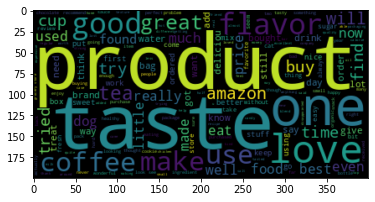

In [156]:
text = " ".join(review_information["Text"])
word_cloud = WordCloud().generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

from this wordcloud, the most frequent words appear in review in the dataset is taste, product, good, one, flavor,great, coffee, great,love and so on

In [157]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


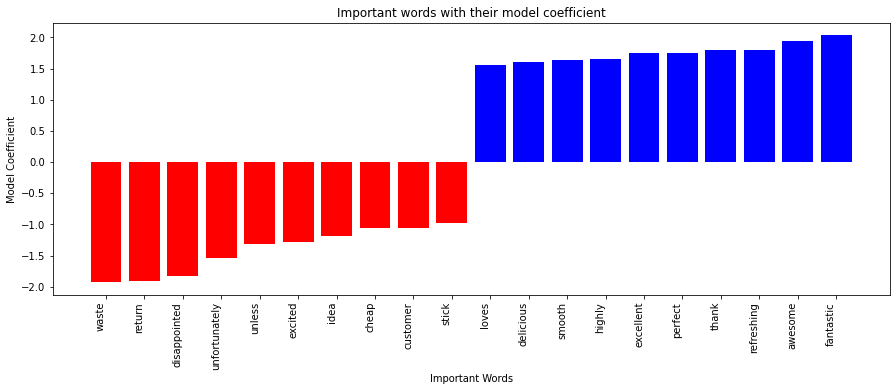

In [158]:
plot_coefficients(log_reg, vectorizer.get_feature_names())

The plot shows 20 words which played important role in making predictions. The red bars show top 10 words with negative model coefficient and blue bars show top 10 words with positive model coefficient values. 

negative:waste, return, disappointed, unfortunately,, unless, excited, idea, cheap, customer, stick.
<br>positive:loves, delicious, smoothly,highly, excellent, perfect, thanks, refreshing, awesome, fantastic.

# Q7

issues: when model is trained by this imbalanced dataset, the model tends to be more biased towards the majority class, causing bad classification of the minority class.
</br>solution: 1.when quantity of data is sufficient, keeping all samples in a rare class and reandomly selecting an equal number of in dataset to form a new balanced dataset.
2. increasing the size of rare samples to balance dataset, there new samples can be generated by repetition, bootstrapping and other Technique. 